In [44]:
# Data Manipulation
import numpy as numpy
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
sns.set_theme(style="darkgrid")

In [46]:
data = pd.read_csv("C:/Users/MONSTER/Desktop/train.csv")

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   merchant_id           291142 non-null  object
 1   month_id              291142 non-null  int64 
 2   merchant_source_name  291142 non-null  object
 3   settlement_period     291142 non-null  object
 4   working_type          291142 non-null  object
 5   mcc_id                291142 non-null  object
 6   merchant_segment      291142 non-null  object
 7   net_payment_count     291142 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [48]:
data.head(15)

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428
5,merchant_43992,202304,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15329
6,merchant_43992,202207,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,7225
7,merchant_43992,202208,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,10056
8,merchant_43992,202210,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,14413
9,merchant_43992,202211,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13893


In [49]:
for col in data.columns:
    if col not in ["merchant_id", "net_payment_count"]:
        print(f"Variable name: {col}")
        print(data[col].value_counts())
        print()

Variable name: month_id
202112    7413
202303    7367
202203    7332
202305    7327
202308    7315
202309    7287
202204    7244
202307    7217
202201    7210
202301    7198
202304    7191
202212    7153
202111    7129
202211    7086
202210    7073
202205    7072
202306    7065
202202    7064
202105    7045
202206    7040
202109    7021
202110    7018
202106    7004
202209    6967
202103    6883
202104    6878
202208    6876
202302    6804
202108    6771
202207    6648
202102    6607
202107    6490
202101    6437
202012    6352
202011    5887
202010    5654
202009    5489
202008    5224
202007    4990
202006    4920
202005    4707
202004    4120
202003    3951
202002    3867
202001    3749
Name: month_id, dtype: int64

Variable name: merchant_source_name
Merchant Source - 1    164996
Merchant Source - 2    112541
Merchant Source - 3     13605
Name: merchant_source_name, dtype: int64

Variable name: settlement_period
Settlement Period - 1    268906
Settlement Period - 3     20553
Settle

In [50]:
data['month_id'] = data['month_id'].astype(str)
data['year'] = data['month_id'].str[:4].astype(int)
data['month'] = data['month_id'].str[4:].astype(int)

def get_season(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else: # 10, 11, 12
        return 'Q4'


data['season'] = data['month'].apply(get_season)

In [51]:
data.head(15)

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,year,month,season
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106,2023,7,Q3
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918,2023,1,Q1
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452,2023,5,Q2
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787,2023,8,Q3
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428,2023,2,Q1
5,merchant_43992,202304,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15329,2023,4,Q2
6,merchant_43992,202207,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,7225,2022,7,Q3
7,merchant_43992,202208,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,10056,2022,8,Q3
8,merchant_43992,202210,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,14413,2022,10,Q4
9,merchant_43992,202211,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13893,2022,11,Q4


<AxesSubplot: xlabel='month_id'>

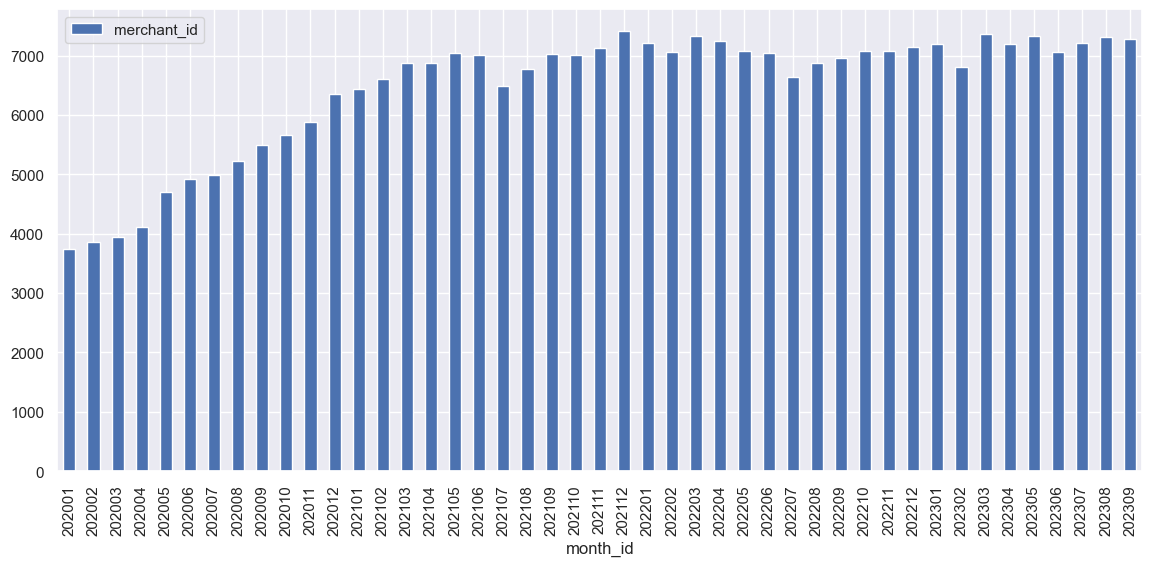

In [52]:
data.groupby("month_id").agg({"merchant_id": "count"}).plot(kind="bar", figsize=(14, 6))

<AxesSubplot: xlabel='merchant_source_name'>

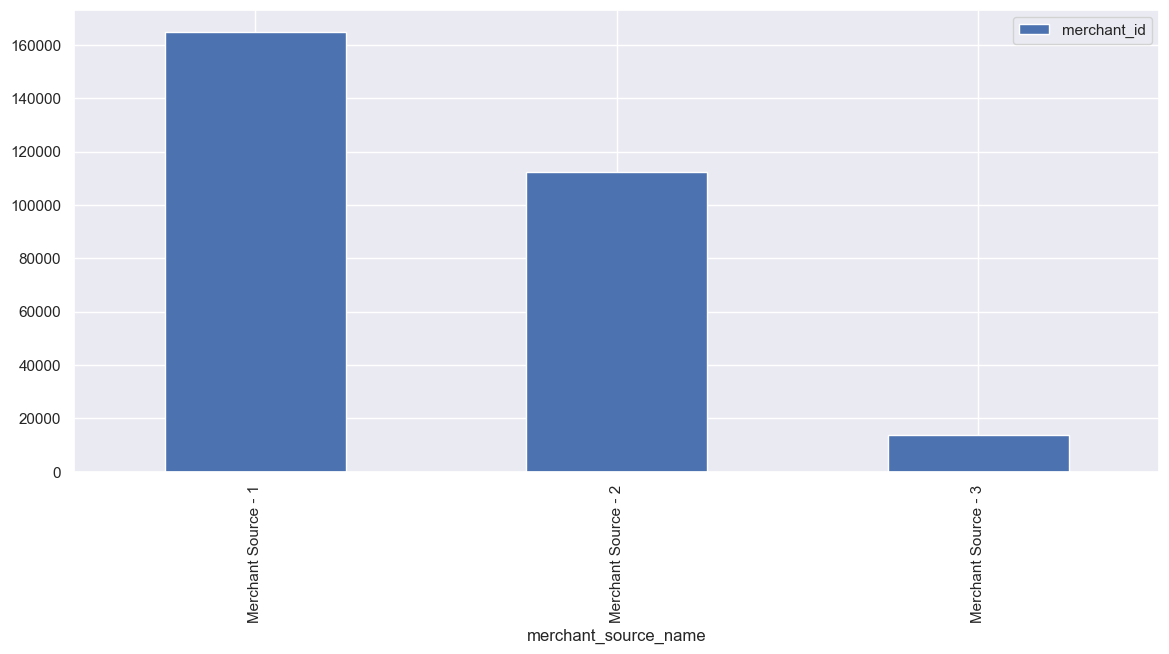

In [53]:
data.groupby("merchant_source_name").agg({"merchant_id": "count"}).plot(kind="bar", figsize=(14, 6))

<AxesSubplot: xlabel='settlement_period'>

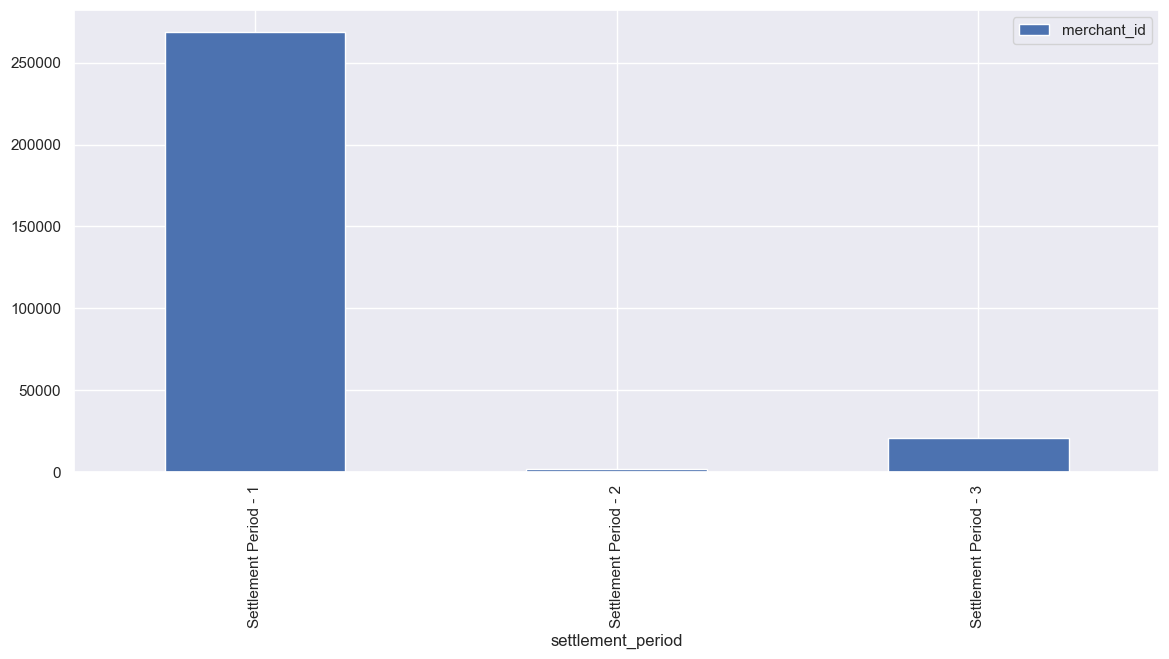

In [54]:
data.groupby("settlement_period").agg({"merchant_id": "count"}).plot(kind="bar", figsize=(14, 6))

<AxesSubplot: xlabel='working_type'>

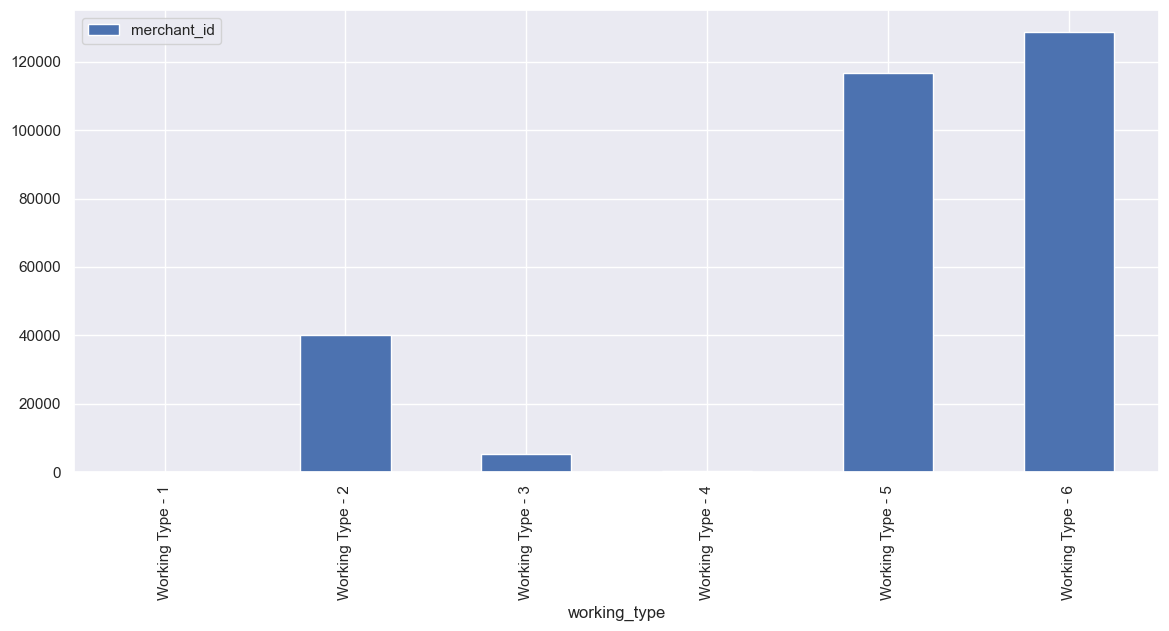

In [55]:
data.groupby("working_type").agg({"merchant_id": "count"}).plot(kind="bar", figsize=(14, 6))

<AxesSubplot: xlabel='merchant_segment'>

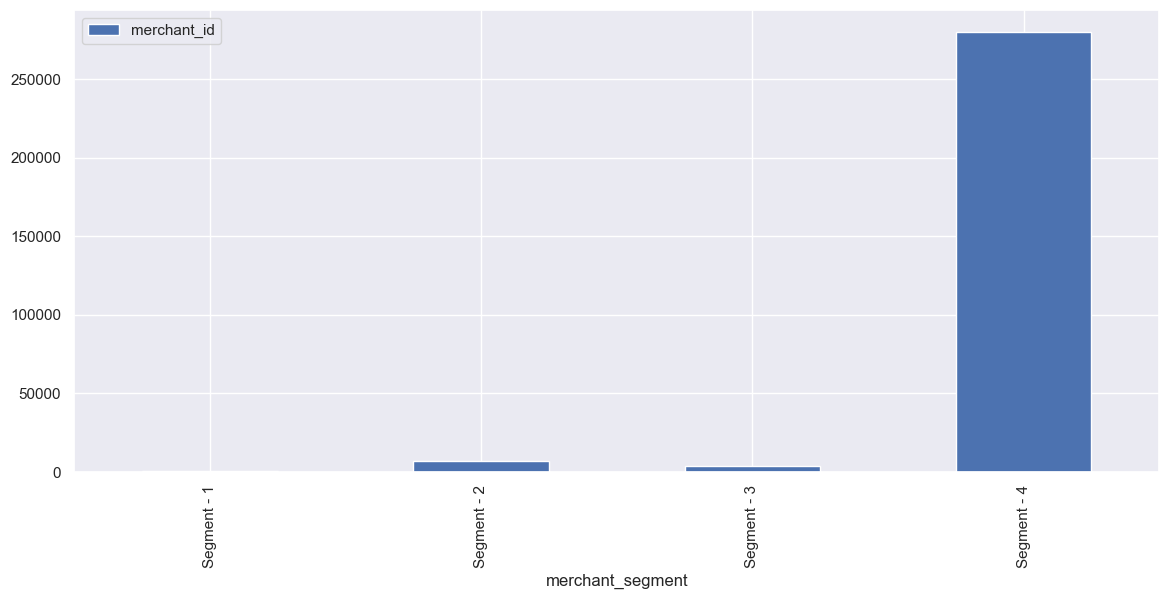

In [56]:
data.groupby("merchant_segment").agg({"merchant_id": "count"}).plot(kind="bar", figsize=(14, 6))

## Visualization Part II.

In [57]:
data = pd.read_csv("C:/Users/MONSTER/Desktop/train.csv")

def get_season(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else: # 10, 11, 12
        return 'Q4'

data['month_id'] = data['month_id'].astype(str)
data['year'] = data['month_id'].str[:4].astype(int)
data['month'] = data['month_id'].str[4:].astype(int)
data['season'] = data['month'].apply(get_season)
data['month_id'] = pd.to_datetime(data['month_id'], format='%Y%m')


column_order = ['month_id', 'merchant_id', 'year', 'month', 'season', 'merchant_source_name', 'settlement_period', 'working_type', 'mcc_id', 'merchant_segment', 'net_payment_count']
data = data[column_order]
data = data.sort_values(by='month_id').reset_index(drop=True)

# Segment column
data.loc[data['merchant_segment'].isin(["Segment - 1", "Segment - 2", "Segment - 3"]), 'merchant_segment'] = "otherSegments123"
data.loc[data['merchant_segment'] == "Segment - 4", 'merchant_segment'] = "StandartSegment4"
# negative values in target 
data.loc[data['net_payment_count'] < 0, 'net_payment_count'] = 0
# mcc_id to integer
data['mcc_id'] = data['mcc_id'].str.replace('mcc_', '').astype(int)
# Working type
data.loc[data['working_type'].isin(["Working Type - 1", "Working Type - 3", "Working Type - 4"]), 'working_type'] = "otherWorkingTypes134"
# settlement_period
data.loc[data['settlement_period'].isin(["Settlement Period - 2", "Settlement Period - 3"]), 'settlement_period'] = "otherSettlementPeriods23"

time_series = data.groupby(["month_id", "merchant_id"]).agg({"net_payment_count": "sum"}).reset_index()

In [67]:
data.head(1)

,month_id,merchant_id,year,month,season,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,2020-01-01,merchant_66740,2020,1,Q1,Merchant Source - 1,Settlement Period - 1,Working Type - 6,130,StandartSegment4,6


In [58]:
def plot_time_series_merchant(dataframe, merchant_id):
    df = dataframe[dataframe["merchant_id"] == merchant_id]
    plt.figure(figsize=(15, 5))
    plt.plot(df["month_id"], df["net_payment_count"])
    plt.title(f"Net Payment Count of Merchant {merchant_id}")
    plt.xlabel("Month")
    plt.ylabel("Net Payment Count")
    plt.show()

In [63]:
def plot_time_series_merchant_segment(dataframe, segment):
    df = dataframe[dataframe["merchant_segment"] == segment]
    df = df.groupby("month_id").agg({"net_payment_count": "mean"}).reset_index()
    plt.figure(figsize=(15, 5))
    plt.plot(df["month_id"], df["net_payment_count"])
    plt.title(f"Net Payment Count of {segment}")
    plt.xlabel("Month")
    plt.ylabel("Net Payment Count")
    plt.show()

In [68]:
def plot_time_series_settlement_period(dataframe, period):
    df = dataframe[dataframe["settlement_period"] == period]
    df = df.groupby("month_id").agg({"net_payment_count": "mean"}).reset_index()
    plt.figure(figsize=(15, 5))
    plt.plot(df["month_id"], df["net_payment_count"])
    plt.title(f"Net Payment Count of {period}")
    plt.xlabel("Month")
    plt.ylabel("Net Payment Count")
    plt.show()

## Merchant Segment Time Series

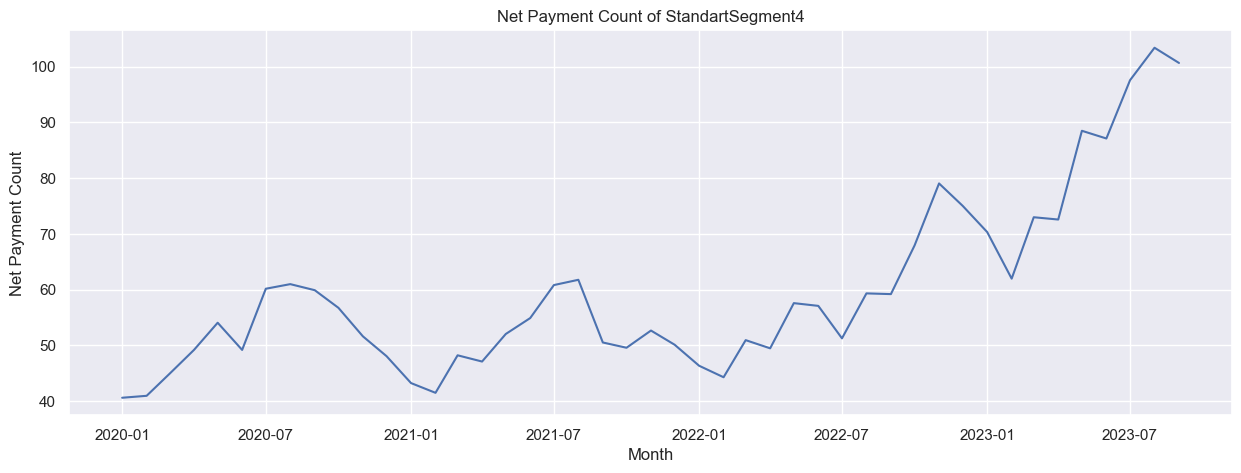

In [64]:
plot_time_series_merchant_segment(data, "StandartSegment4")

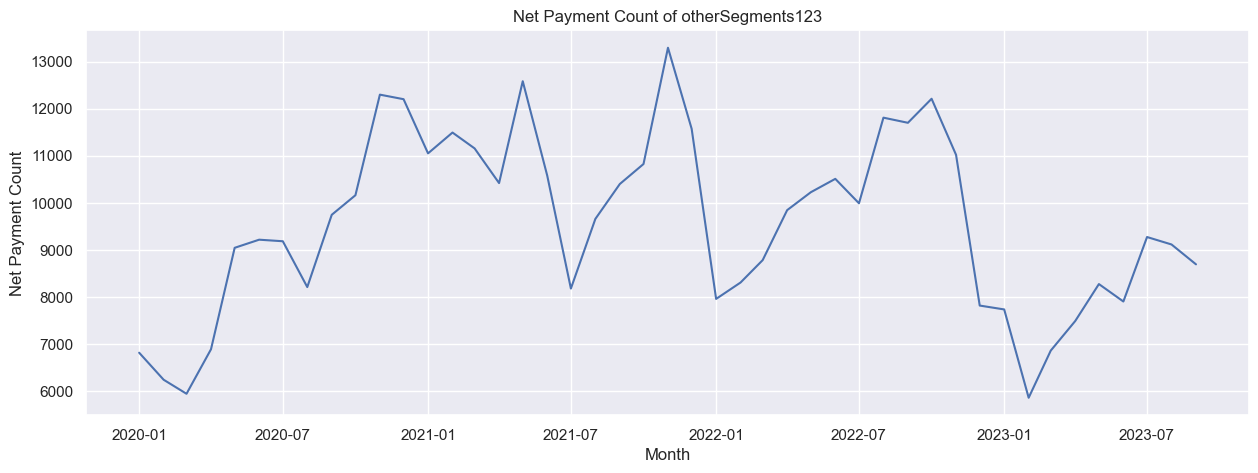

In [65]:
plot_time_series_merchant_segment(data, "otherSegments123")

## Settlement Period Time Series

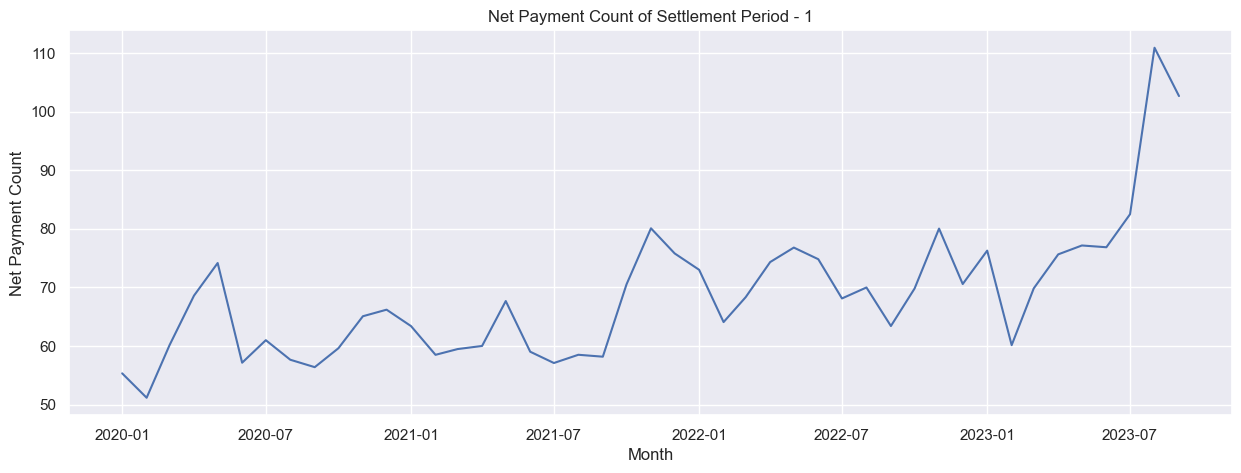

In [69]:
plot_time_series_settlement_period(data, "Settlement Period - 1")

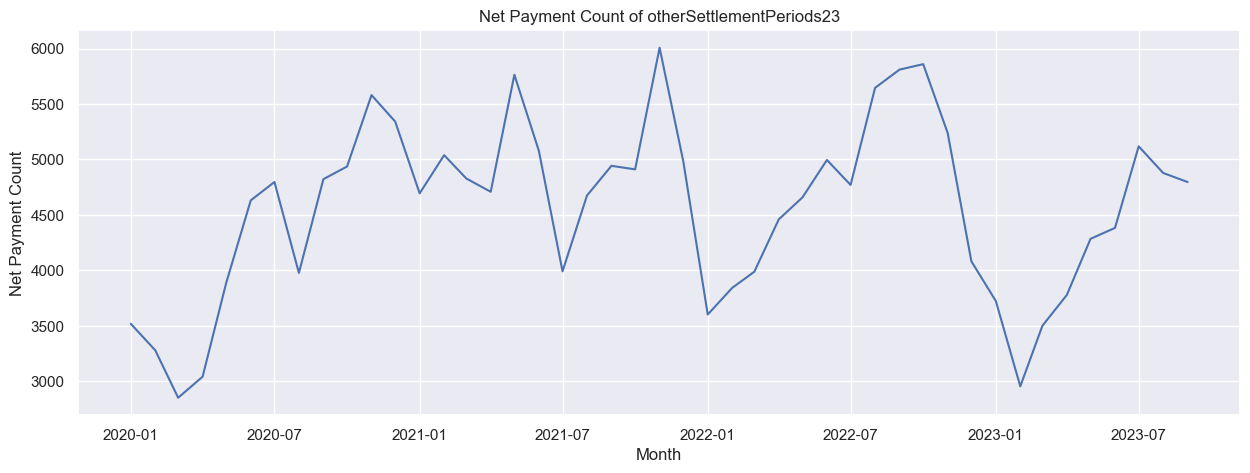

In [70]:
plot_time_series_settlement_period(data, "otherSettlementPeriods23")